In [1]:
from analyzer import PITCHfx, GameLogs, PlayerMap
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## year and pitcher to analyze
year = 2017
pitcher = 'grayj003'

## combine PITCHfx and GameLogs for ease of analysis
pfx = PITCHfx(year)+GameLogs(year)

## get name maps and merge with dataframe
PM = PlayerMap()
pfx.df['mlb_id'] = pfx.df['pitcher']
PM.slim_frame(['mlb_id','retro_id','retro_name'])
pfx = pfx+PM

## filter on pitcher retro id
pfx.filter_by_pitchers(pitcher)

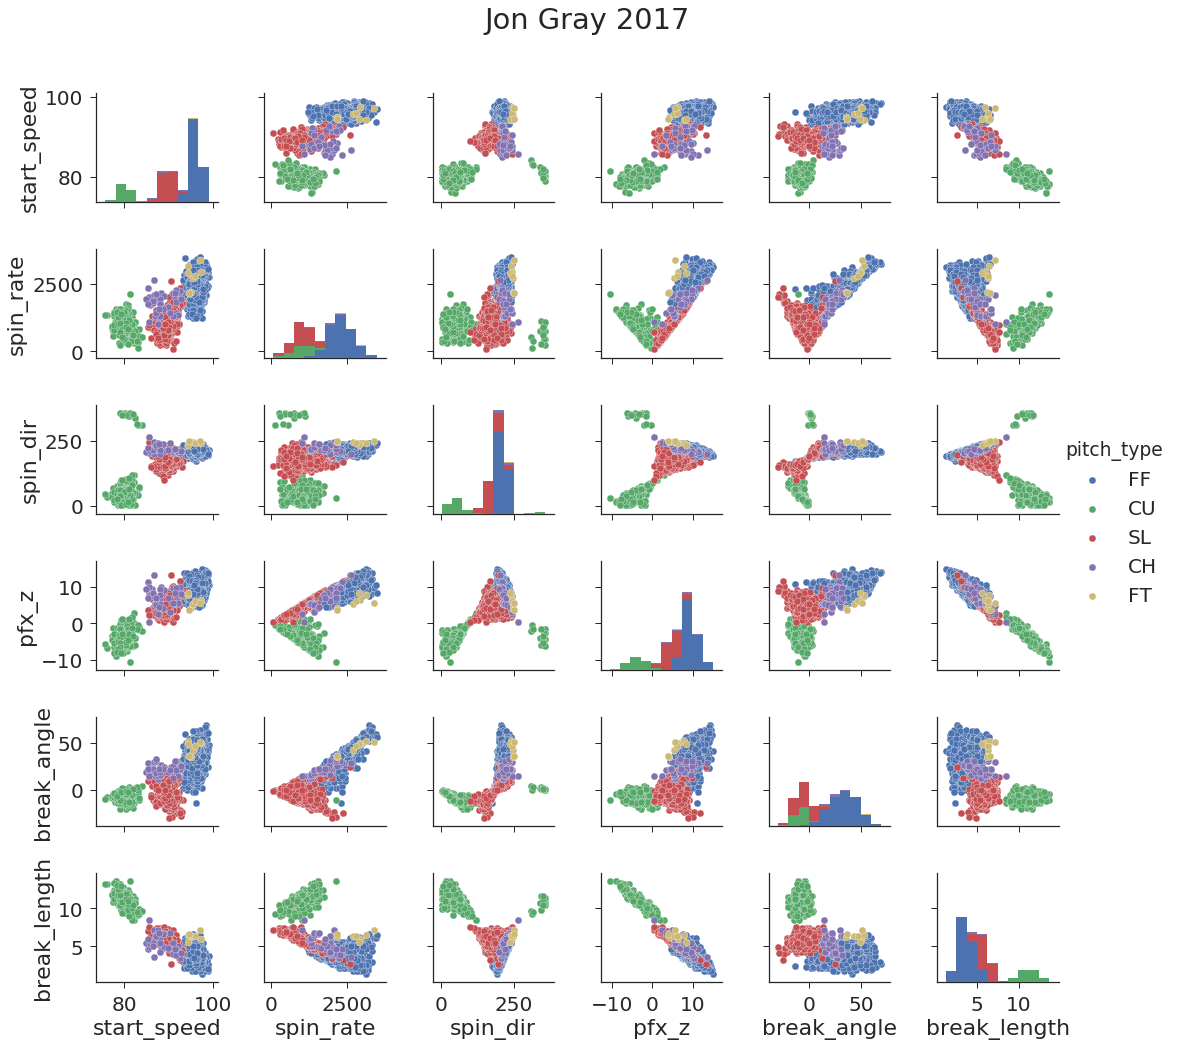

In [3]:
## have a look at relationships between continuous variables
## by pitch type
## set plot parameters
tmp = plt.rc('font', size=16)
fig = plt.figure(figsize=(15,10))
tmp = sns.set(style="ticks", font_scale=2)
## scatter matrix
sns_plot = sns.pairplot(pfx.df[['start_speed','spin_rate','spin_dir','pfx_z','break_angle','break_length','pitch_type']],
                        hue="pitch_type")
out_file_name = '-'.join(pfx.df.retro_name.unique()[0].lower().split())+'-'+str(year)+'.png'
sns_plot.savefig('figs/'+out_file_name)
sns_plot.fig.suptitle(pfx.df.retro_name.unique()[0]+" "+str(year))
sns_plot.fig.subplots_adjust(top=.9)


In [4]:
## split frames by pitch type for further investigation
pitch_types = pfx.df['pitch_type'].dropna().unique()
frames_by_type = [pfx.df[pfx.df['pitch_type']==pitch] for pitch in pitch_types]

In [5]:
## for making individual scatter plots
def make_scatter_by_type(x, y):
    """Function to show 2d scatter plots of variables x and y (given as strings)"""
    fig = plt.figure(figsize=(15,10))
    for it in range(len(pitch_types)):
        plt.scatter(frames_by_type[it][x],frames_by_type[it][y], label=pitch_types[it], s=100)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()

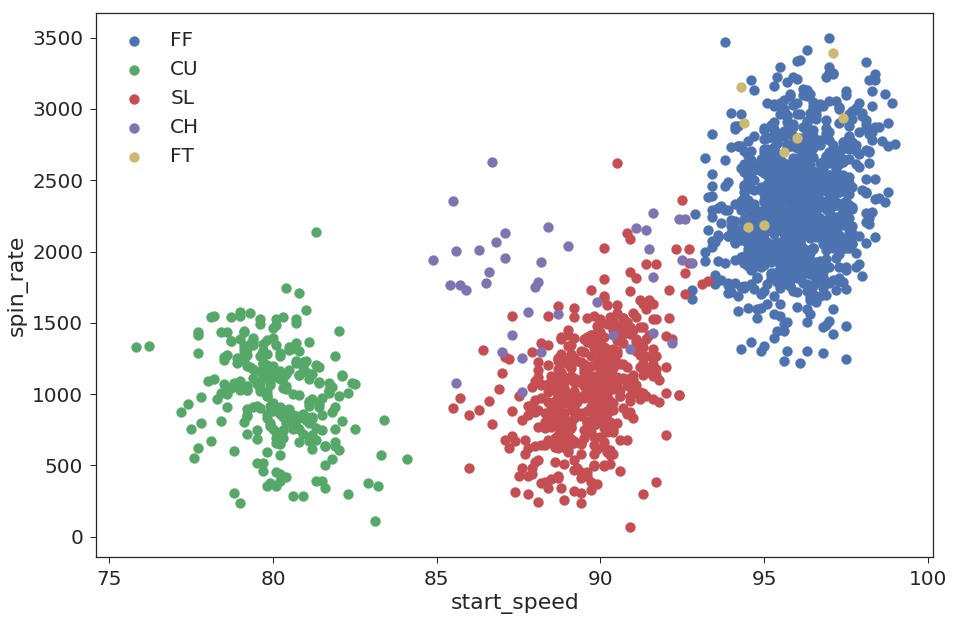

In [6]:
make_scatter_by_type('start_speed','spin_rate')

In [7]:
PM.df.retro_id[PM.df.retro_name=='Jon Gray']

1376    grayj003
Name: retro_id, dtype: object